# Задания практической работы

## Задание 1. Обнаружение и обработка пропущенных значений
#### Датасет: titanic (пассажиры Титаника)
#### Источник: seaborn.load_dataset("titanic")
#### Инструкции:
 1. Загрузите датасет titanic.
 2. Определите количество пропущенных значений в каждом столбце.
 3. Визуализируйте пропуски с помощью библиотеки missingno
 4. Заполните пропущенные значения:
      - признак age - средним значением;
      - признак embarked - наиболее частым значением;
      - признак deck - удалите.
 5. Отобразите информацию о таблице до и после обрабоки (.info(), .isna().sum()).

#### 1. Загрузите датасет titanic.

In [78]:
import seaborn as sns
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### 2. Определите количество пропущенных значений в каждом столбце.

In [80]:
print("Количество пропущенных значений в каждом столбце:")
print(df.isna().sum())

print("Информация до обработки:")
df.info()

Количество пропущенных значений в каждом столбце:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Информация до обработки:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  a

#### 3. Визуализируйте пропуски с помощью библиотеки missingno.

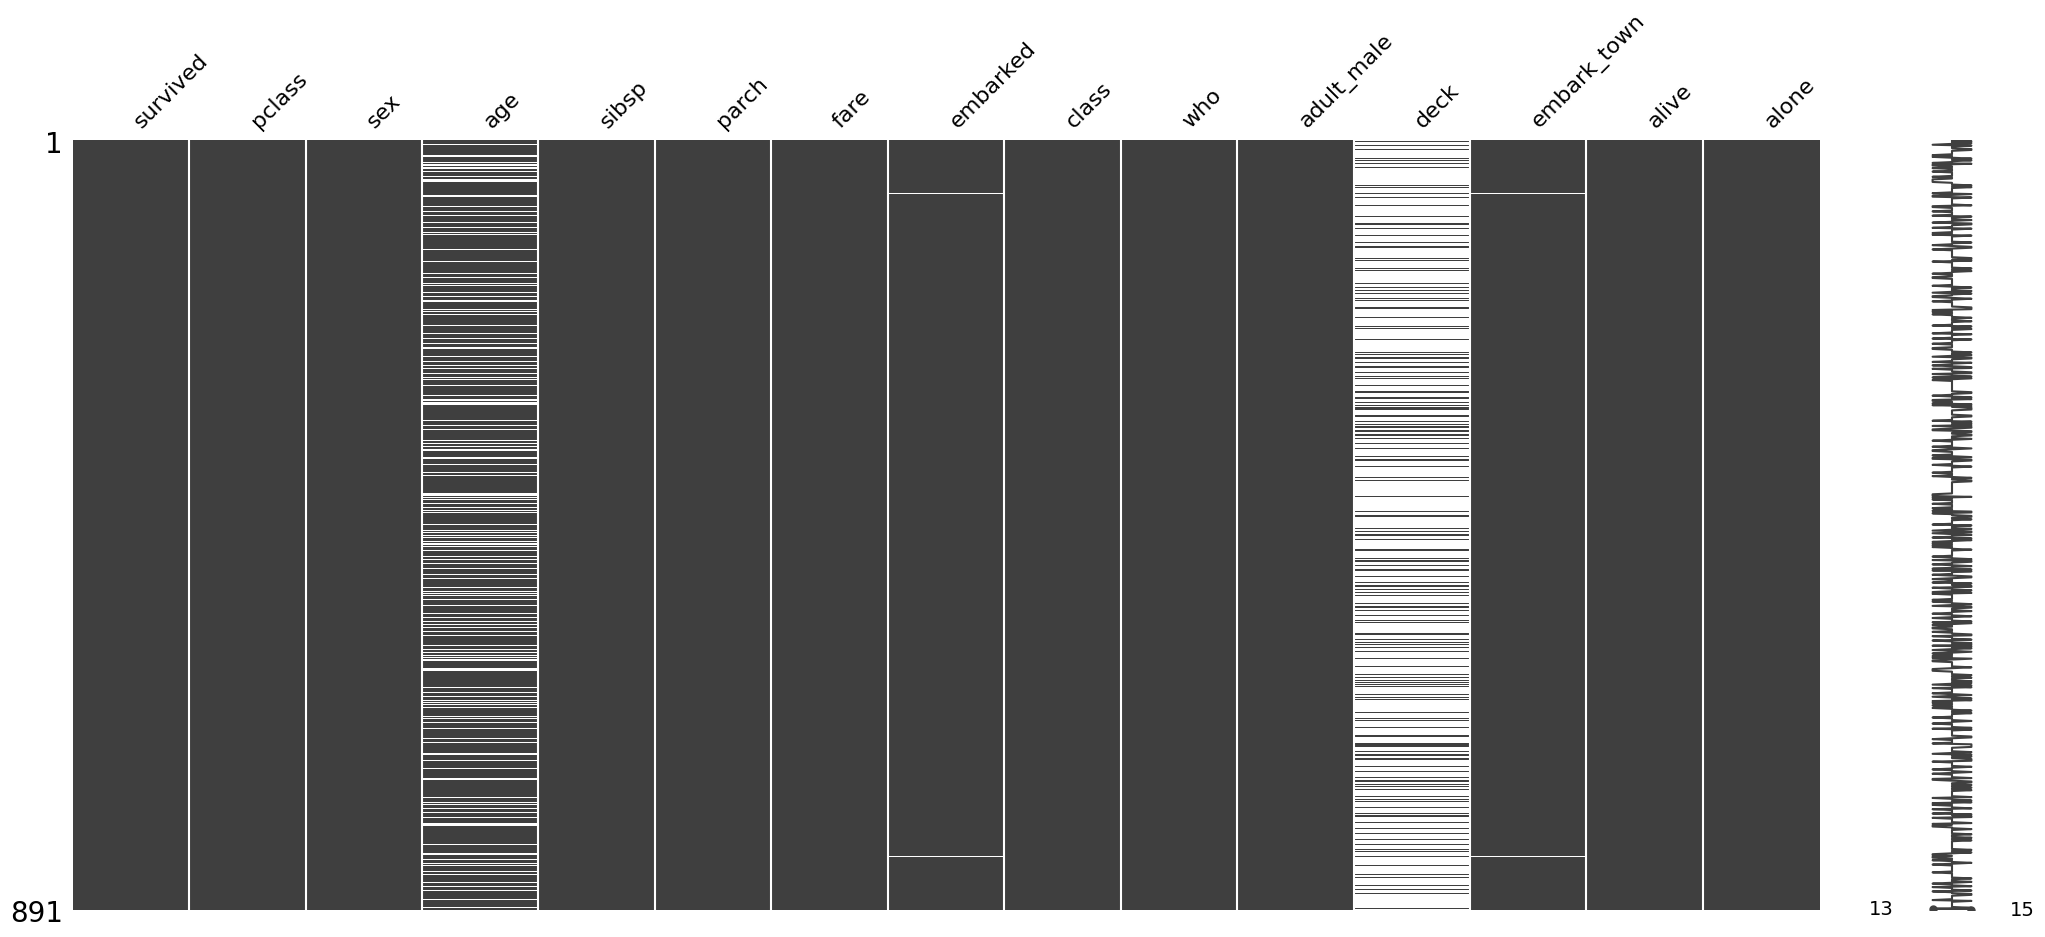

In [22]:
msno.matrix(df)
plt.show()

#### 4. Заполните пропущенные значения:
    - признак age - средним значением;
    - признак embarked - наиболее частым значением;
    - признак deck - удалите.

In [82]:
df['age'] = df['age'].fillna(df['age'].mean())

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

df.drop(columns='deck', inplace=True)

#### 5. Информация после обработки

In [84]:
print(df.isna().sum())
df.info()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  

## Задание 2. Обнаружение и удаление выбросов
#### Датасет: penguins (описание антарктических пингвинов)
#### Источник: seaborn.load_dataset("penguins")
#### Инструкции:
 1. Загрузите датасет penguins.
 2. Постройте boxplot-графики для признаков bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g.
 3. Используя метод межквартильного размаха (IQR), выявите и удалите выбросы по каждому из указанных признаков.
 4. Сравните размеры датасета до и после фильтрации.
 5. Постройте boxplot-график до и после удаления выбросов для одного из признаков.

#### 1. Загрузите датасет penguins.

In [91]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### 2. Постройте boxplot-графики для признаков bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g.

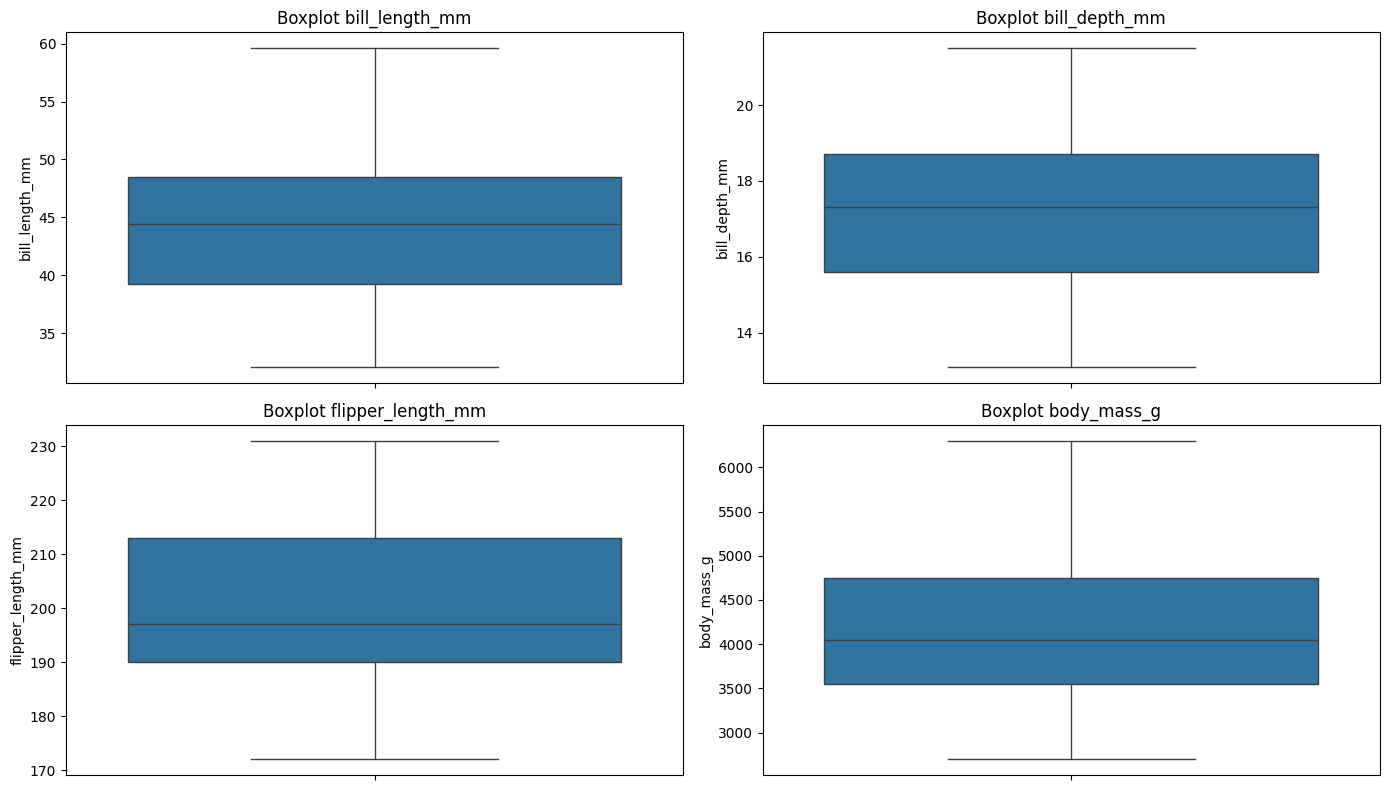

In [98]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(14, 8))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

#### 3. Используя метод межквартильного размаха (IQR), выявите и удалите выбросы по каждому из указанных признаков.

In [102]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_filtered = df.copy()
for col in features:
    df_filtered = remove_outliers_iqr(df_filtered, col)

#### 4. Сравните размеры датасета до и после фильтрации.

In [107]:
print("До фильтрации:", df.shape)
print("После фильтрации:", df_filtered.shape)

До фильтрации: (344, 7)
После фильтрации: (342, 7)


#### 5. Постройте boxplot-график до и после удаления выбросов для одного из признаков.

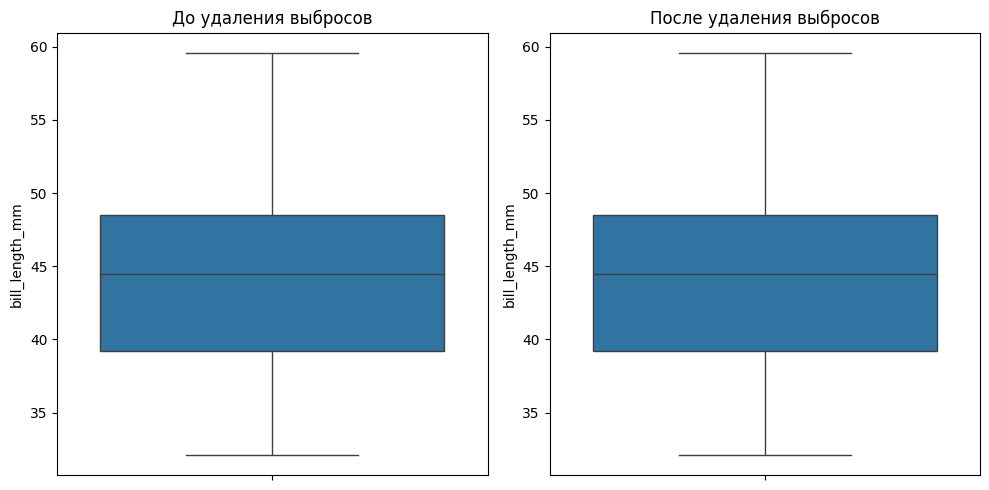

In [114]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='bill_length_mm')
plt.title("До удаления выбросов")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_filtered, y='bill_length_mm')
plt.title("После удаления выбросов")

plt.tight_layout()
plt.show()

## Задание 3. Масштабирование числовых признаков
#### Датасет: california housing
#### Источник: from sklearn.datasets import fetch_california_housing
#### Инструкции:
 1. Загрузите данные с помощью fetch_california_housing(as_frame=True).
 2. Преобразуйте данные в pandas.DataFrame.
 3. Выполните:
      - стандартизацию признаков с помощью StandardScaler;
      - нормализацию в диапазон [0, 1] с помощью MixMaxScaler (на копии таблицы).
 4. Постройте гистограммы распределения признака MedInc до и после масштабирования.
 5. Сравните поведение шкал на гистограммах.

#### 1. Загрузите данные с помощью fetch_california_housing(as_frame=True).

In [119]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data = fetch_california_housing(as_frame=True)

#### 2. Преобразуйте данные в pandas.DataFrame.

In [122]:
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### 3. Выполните:
      - стандартизацию признаков с помощью StandardScaler;
      - нормализацию в диапазон [0, 1] с помощью MixMaxScaler (на копии таблицы).

In [126]:
# стандартизация признаков с помощью StandardScaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

df_standardized = df.copy()
df_standardized[df.columns] = standard_scaler.fit_transform(df)

df_standardized.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


In [128]:
# нормализация в диапазон [0, 1] с помощью MixMaxScaler (на копии таблицы)
from sklearn.preprocessing import  MinMaxScaler

minmax_scaler = MinMaxScaler()

df_minmax = df.copy()
df_minmax[df.columns] = minmax_scaler.fit_transform(df)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


#### 4. Постройте гистограммы распределения признака MedInc до и после масштабирования.

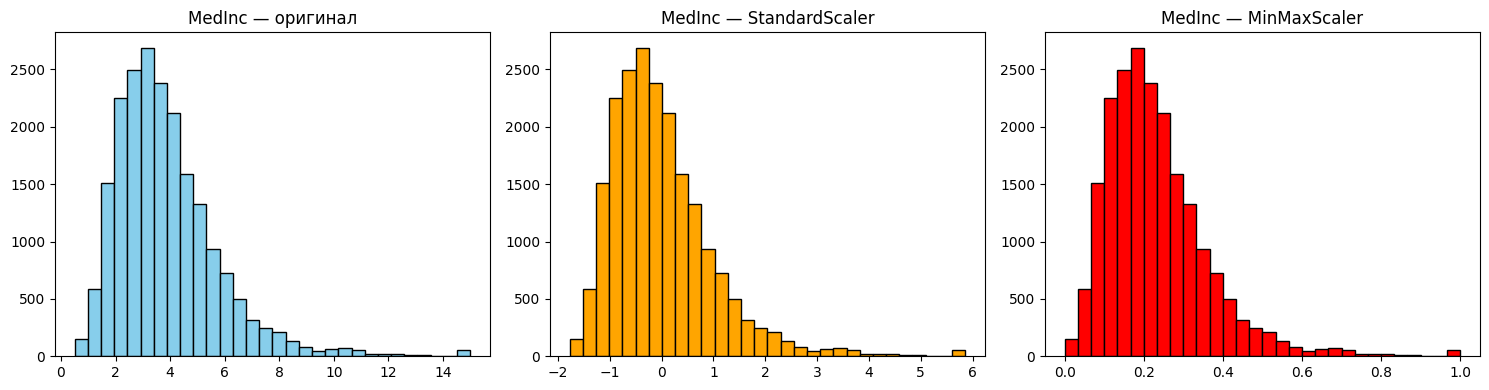

In [152]:
plt.figure(figsize=(15, 4))

# Оригинальные данные
plt.subplot(1, 3, 1)
plt.hist(df['MedInc'], bins=30, color='skyblue', edgecolor='black')
plt.title("MedInc — оригинал")

# После стандартизации
plt.subplot(1, 3, 2)
plt.hist(df_standardized['MedInc'], bins=30, color='orange', edgecolor='black')
plt.title("MedInc — StandardScaler")

# После нормализации
plt.subplot(1, 3, 3)
plt.hist(df_minmax['MedInc'], bins=30, color='red', edgecolor='black')
plt.title("MedInc — MinMaxScaler")

plt.tight_layout()
plt.show()


#### 5. Сравните поведение шкал на гистограммах.
#### StandartScaler:
- приводит признак к распределению со средним 0 и стандартным отклонением 1. Распределение сохраняет форму, но сдвинуто по шкале
#### MinMaxScaler:
- масштабирует данные в диапазон [0, 1]. Форма распределения сохраняется, но значения сжаты в диапазон от 0 до 1

## Задание 4. Кодирование категориальных признаков
#### Датасет: adult (перепись населения США, income dataset)
#### Источник: https://archive.ics.uci.ecu/ml/datasets/adult
#### Инструкции:
 1. Загрузите данные и отберите признаки:
    - категориальные: education, marital-status, occupation;
    - целевой признак: income.
 2. Проведите Label Encoding для признака education, предполагая, что уровни образования упорядочены.
 3. Примените One-Hot Encoding к признакам marital-status и occupation.
 4. Проверьте иготовую размерность таблицы до и после кодирования.
 5. Убедитесь, что в one-hot-кодировании не присутствует дамми-ловушка.

#### 1. Загрузите данные и отберите признаки:
    - категориальные: education, marital-status, occupation;
    - целевой признак: income.

In [174]:
from sklearn.datasets import fetch_openml
import pandas as pd


data = fetch_openml("adult", version=2, as_frame=True)
df = data.frame

df = data.data[['education', 'marital-status', 'occupation']].copy()

df['income'] = data.target

df.head()

,education,marital-status,occupation,income
0,11th,Never-married,Machine-op-inspct,<=50K
1,HS-grad,Married-civ-spouse,Farming-fishing,<=50K
2,Assoc-acdm,Married-civ-spouse,Protective-serv,>50K
3,Some-college,Married-civ-spouse,Machine-op-inspct,>50K
4,Some-college,Never-married,NaN,<=50K


#### 2. Проведите Label Encoding для признака education, предполагая, что уровни образования упорядочены.

In [160]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['education_encoded'] = le.fit_transform(df['education'])

df.head()

,education,marital-status,occupation,income,education_encoded
0,11th,Never-married,Machine-op-inspct,<=50K,1
1,HS-grad,Married-civ-spouse,Farming-fishing,<=50K,11
2,Assoc-acdm,Married-civ-spouse,Protective-serv,>50K,7
3,Some-college,Married-civ-spouse,Machine-op-inspct,>50K,15
4,Some-college,Never-married,NaN,<=50K,15


#### 3. Примените One-Hot Encoding к признакам marital-status и occupation.

In [163]:
df_encoded = pd.get_dummies(df, columns=['marital-status', 'occupation'], drop_first=True)

df_encoded.head()

,education,income,education_encoded,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,11th,<=50K,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,HS-grad,<=50K,11,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Assoc-acdm,>50K,7,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Some-college,>50K,15,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,Some-college,<=50K,15,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### 4. Проверьте иготовую размерность таблицы до и после кодирования.

In [166]:
print("Размерность таблицы до кодирования:", df.shape)
print("Размерность таблицы после кодирования:", df_encoded.shape)

Размерность таблицы до кодирования: (48842, 5)
Размерность таблицы после кодирования: (48842, 22)


#### 5. Убедитесь, что в one-hot-кодировании не присутствует дамми-ловушка.

In [171]:
for col in ['marital-status', 'occupation']:
    unique_vals = df[col].nunique()
    dummy_cols = [c for c in df_encoded.columns if c.startswith(col + '_')]
    print(f"Признак {col}: уникальных значений = {unique_vals}, dummy-столбцов = {len(dummy_cols)}")

Признак marital-status: уникальных значений = 7, dummy-столбцов = 6
Признак occupation: уникальных значений = 14, dummy-столбцов = 13


## Задание 5. Комплексный EDA
#### Датасет: heart disease (заболевания сердца)
#### Источник: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
#### Инструкции: Выполните полный цикл EDA:
1. Обзор структуры данных (.info(), describe()).
2. Обнаружение и обработка пропущенных значений.
3. Обнаружение и удаление выбросов по признакам: age, cholesterol, restingbp, maxhr.
4. Масштабирование числовых признаков.
5. Кодирование категориальных признаков: sex, chestpain, exerciseangina, restecg.


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style="whitegrid")
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### 1. Обзор структуры данных (.info(), describe()).

In [191]:
print("=== Общая информация о данных ===")
df.info()

print("\n\n=== Описательная статистика числовых признаков ===")
df.describe()

=== Общая информация о данных ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


=== Описательная статистика числовых признаков ===


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### 2. Обнаружение и обработка пропущенных значений.

In [196]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#### 3. Обнаружение и удаление выбросов по признакам: age, cholesterol, restingbp, maxhr

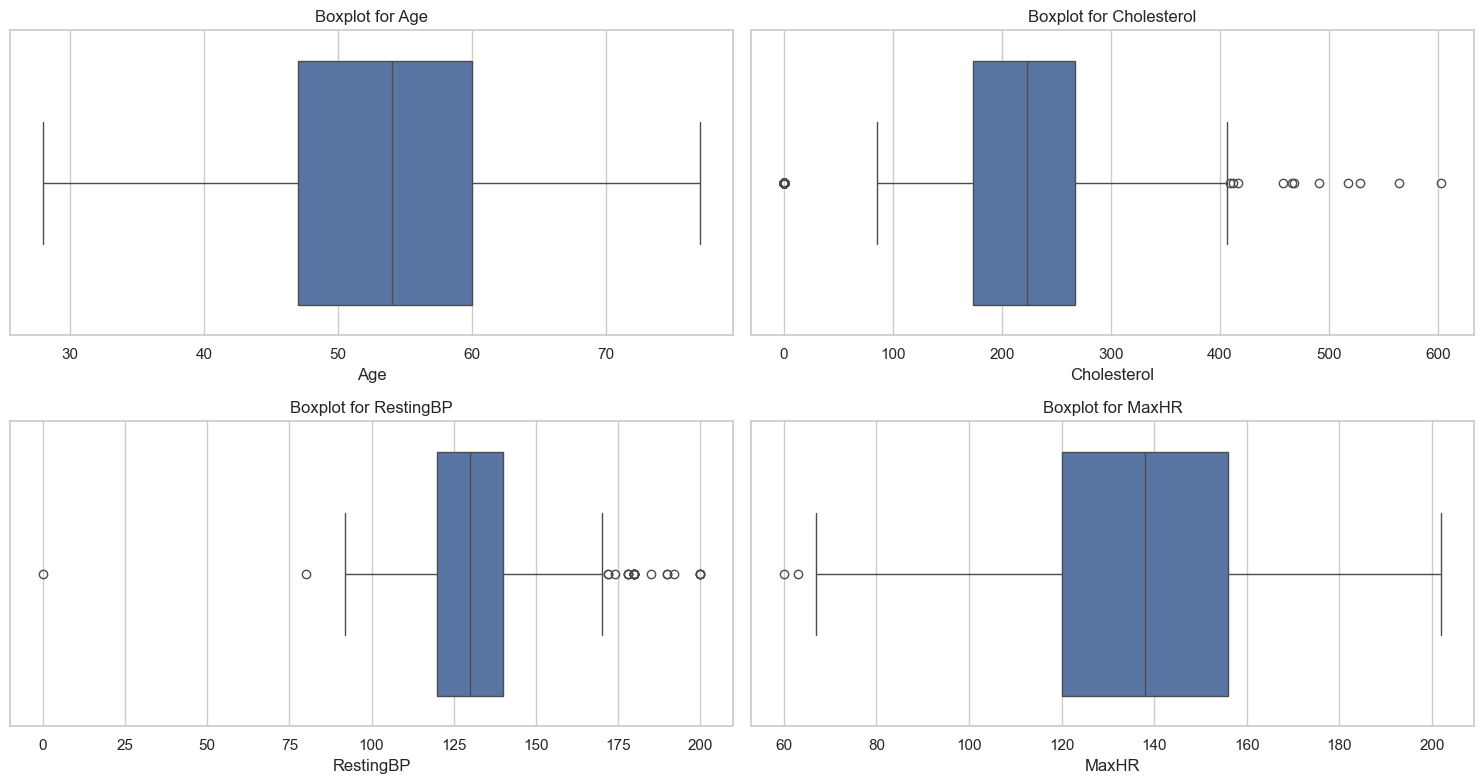

In [201]:
def plot_boxplots(df, features):
    plt.figure(figsize=(15, 8))
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot for {feature}')
    plt.tight_layout()
    plt.show()

features_to_check = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']
plot_boxplots(df, features_to_check)

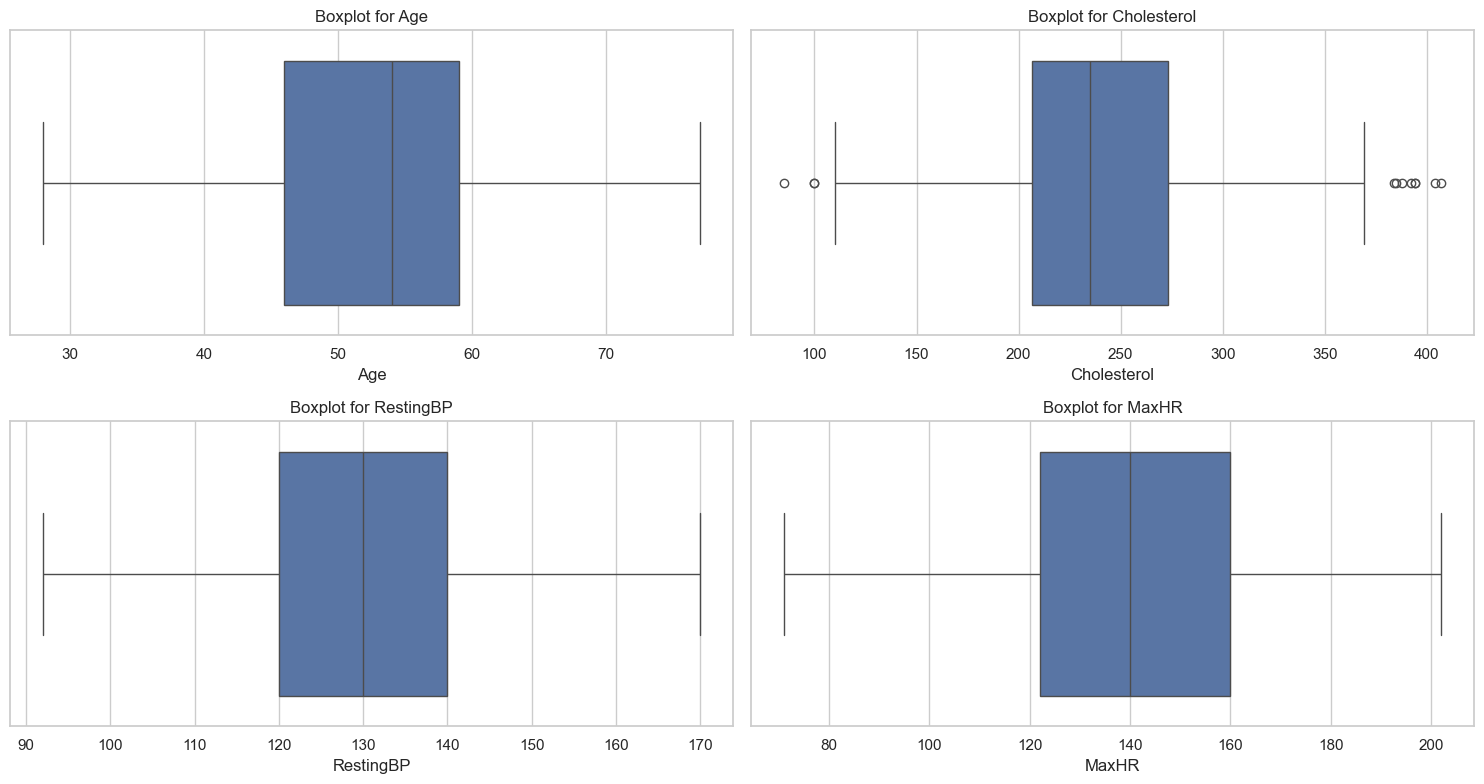

In [209]:
# Удаление выбросов через IQR
def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

df_clean = remove_outliers_iqr(df, features_to_check)

plot_boxplots(df_clean, features_to_check)

#### 4. Масштабирование числовых признаков.

In [211]:
num_features = ['Age', 'Cholesterol', 'RestingBP', 'MaxHR']

scaler = StandardScaler()
df_clean[num_features] = scaler.fit_transform(df_clean[num_features])

df_clean[num_features].describe()

,Age,Cholesterol,RestingBP,MaxHR
count,7.150000e+02,7.150000e+02,7.150000e+02,7.150000e+02
mean,-3.180051e-16,-1.714246e-16,7.478090e-16,2.981298e-16
std,1.000700e+00,1.000700e+00,1.000700e+00,1.000700e+00
min,-2.601504e+00,-3.047572e+00,-2.574934e+00,-2.849613e+00
25%,-7.149116e-01,-6.594445e-01,-7.583156e-01,-7.558124e-01
50%,1.235740e-01,-9.926649e-02,-1.095234e-01,-1.682390e-02
75%,6.476275e-01,6.476376e-01,5.392688e-01,8.042744e-01
max,2.534220e+00,3.281457e+00,2.485645e+00,2.528581e+00


#### 5. Кодирование категориальных признаков: sex, chestpain, exerciseangina, restecg.

In [215]:
cat_features = ['Sex', 'ChestPainType', 'ExerciseAngina', 'RestingECG']
for col in cat_features:
    print(f"{col} unique values: {df_clean[col].unique()}")


df_clean['Sex'] = df_clean['Sex'].map({'M':1, 'F':0}) if df_clean['Sex'].dtype == object else df_clean['Sex']
df_clean['ExerciseAngina'] = df_clean['ExerciseAngina'].map({'Y':1, 'N':0}) if df_clean['ExerciseAngina'].dtype == object else df_clean['ExerciseAngina']
df_clean = pd.get_dummies(df_clean, columns=['ChestPainType', 'RestingECG'], drop_first=True)

df_clean.head()

Sex unique values: ['M' 'F']
ChestPainType unique values: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina unique values: ['N' 'Y']
RestingECG unique values: ['Normal' 'ST' 'LVH']


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST
0,-1.343776,1,0.539269,0.962124,0,1.296933,0,0.0,Up,0,True,False,False,True,False
1,-0.400479,0,1.836853,-1.180312,0,0.640055,0,1.0,Flat,1,False,True,False,True,False
2,-1.658208,1,-0.109523,0.844191,0,-1.741130,0,0.0,Up,0,True,False,False,False,True
3,-0.505290,0,0.409510,-0.512029,0,-1.330581,1,1.5,Flat,1,False,False,False,True,False
4,0.123574,1,1.188061,-0.885481,0,-0.755812,0,0.0,Up,0,False,True,False,True,False


#### 6. Итоговое состояние данных
#### После проведение EDA:
    • Обработка пропущенных значений: все пропуски обнаружены и корректно устранены, что позволило избежать искажений при дальнейшем анализе и моделировании.
    • Обнаружение и удаление выбросов: применён метод межквартильного размаха (IQR) для выявления и удаления аномальных значений по ключевым числовым признакам (age, cholesterol, restingbp, maxhr), что улучшило качество данных и повысило надёжность моделей.
    • Масштабирование числовых признаков: выполнена стандартизация с помощью StandardScaler для нормализации диапазона значений и повышения эффективности алгоритмов машинного обучения.
    • Кодирование категориальных признаков: бинарные категории (sex, exerciseangina) преобразованы в числовые метки с помощью Label Encoding, многоклассовые признаки (chestpain, restecg) — с помощью One-Hot Encoding
#### Таким образом, набор данных приведён к аналитически чистому и модельно-готовому виду, готов к дальнейшему использованию для:
    • визуализации взаимосвязей между признаками;
    • построения и оценки предсказательных моделей;
    • вычисления статистических и корреляционных показателей;
    

# Индивидуальное практическое задание

#### Цель: 
Выполнить полноценный исследовательский анализ данных (EDA), применяя методы выявления обработки пропусков, масштабирования числовых признаков и кодирования категориальных переменных.

#### Условия выполнения
1. Выберите реальный табличный датасет со структурой не менее 8 признаков и целевым признаком, подходящим для задач регрессии или классификации.
Возможные варианты:
- датасеты с платформ Kaggle, UCI, OpenML;
- встроенные датасеты из библиотек sklearn, seaborn;
- или запросите рекомендованный набор у преподавателя.
2. Убедитесь, что в датасете присутствуют:
- числовые признаки,
- категориальные признаки,
- целевой столбец (предсказуемый признак),
- необязательно: пропущенные значения или выбросы.
#### Датасет: 
https://archive.ics.uci.edu/dataset/222/bank+marketing

#### 1. Обзор структуры данных.
Датасет содержит 45211 объекта и 17 признаков, включая 7 числовых  и 10 категориальных признаков. В качестве целевого признака был выбран y.
Датасет содержит информацию о клиентах банка, Целевая переменная y (no / yes) — бинарный признак, обозначает, согласился ли клиент на предложение банка (например, подписку на депозит).


In [152]:
import pandas as pd

file_path = "data/bank-full.csv"
df = pd.read_csv(file_path, sep=';')

display(df.head())

print(df.info())

print(df.describe(include='all'))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
                 age          job  marital  education default        balance  \
count   45211.

#### 2. Обнаружение и обработка пропусков.

In [154]:
display(df['y'].value_counts())

print(df.isnull().sum())

print("\n\n=========================")
print(df['contact'].value_counts())
print(df['poutcome'].value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


#### В датасете отсутствуют явные пропуски (NaN) во всех столбцах. Проверка с помощью метода isnull().sum() показала нулевые значения для всех признаков. Однако столбцы contact и poutcome имеют высокое процентное значение unknown:
- contact: 28.8% unknown (13,020 записей)
- poutcome: 81.8% unknown (36,959 записей)
#### Для столбца contact значения "unknown" оставляем без изменений, так как доля в 28.8% является значимой, но не критичной для анализа
#### Для столбца poutcome принимаем решение удалить столбец полностью, так как: 
- Слишком высокая доля unknown (81.8%)
- Оставшиеся значения не репрезентативны
- Признак теряет аналитическую ценность

In [156]:
df.drop('poutcome', axis=1, inplace=True)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


#### 3. Обнаружение и удаление выбросов.

In [158]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
    
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']

df_clean = remove_outliers_iqr(df.copy(), numeric_cols)  

print(f'Объем данных до очистки: {df.shape[0]}')
print(f'Объем данных после очистки: {df_clean.shape[0]}')
print(f'Удалено записей: {df.shape[0] - df_clean.shape[0]}')

Объем данных до очистки: 45211
Объем данных после очистки: 31261
Удалено записей: 13950


#### 4. Масштабирование числовых признаков.

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

display(df_clean.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,1.742282,management,married,tertiary,no,2143,yes,no,unknown,5,may,0.399706,-0.884028,0.0,0.0,no
1,0.338308,technician,single,secondary,no,29,yes,no,unknown,5,may,-0.390444,-0.884028,0.0,0.0,no
2,-0.764815,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,-0.929182,-0.884028,0.0,0.0,no
3,0.639160,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,-0.814251,-0.884028,0.0,0.0,no
4,-0.764815,unknown,single,unknown,no,1,no,no,unknown,5,may,-0.052834,-0.884028,0.0,0.0,no


Признаки могут иметь разные единицы измерения (например, возраст в годах и доход в рублях). Масштабирование приводит все признаки к одному масштабу, что делает их сравнимыми.

#### 5. Кодирование категориальных признаков.

In [162]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le_y = LabelEncoder()
df_clean['y'] = le_y.fit_transform(df_clean['y']) 

one_hot_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

df_clean = pd.get_dummies(df_clean, columns=one_hot_cols, drop_first=True)

display(df_clean.head())

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.742282,2143,5,0.399706,-0.884028,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.338308,29,5,-0.390444,-0.884028,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
2,-0.764815,2,5,-0.929182,-0.884028,0.0,0.0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
3,0.639160,1506,5,-0.814251,-0.884028,0.0,0.0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
4,-0.764815,1,5,-0.052834,-0.884028,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


#### 6. Финальный набор данных.

In [172]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Проверка пропусков
print("Пропуски после обработки:")
display(df_clean.isnull().sum())

# Проверка типов данных
print("\nТипы данных:")
display(df_clean.dtypes)

# Проверка масштабирования числовых признаков
num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
print("\nСтатистика по масштабированным признакам:")
display(df_clean[num_cols].describe().round(2))

# Проверка типов после масштабирования
print("\nТипы после масштабирования:")
display(df_clean[num_cols].dtypes)

# Проверка категориальных данных
print("\nПример данных:")
display(df_clean.head(2))

# Автоматические проверки
assert df_clean.isnull().sum().sum() == 0, "Есть пропуски!"
assert df_clean.select_dtypes(include=['object']).shape[1] == 0, "Остались категориальные строковые данные!"

display(f"\nФорма итогового датасета: {df_clean.shape}")

print("✓ Все проверки пройдены. Данные готовы к использованию в моделях!")

Пропуски после обработки:


age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0



Типы данных:


age                    float64
balance                  int64
day                      int64
duration               float64
campaign               float64
pdays                  float64
previous               float64
y                        int32
job_blue-collar           bool
job_entrepreneur          bool
job_housemaid             bool
job_management            bool
job_retired               bool
job_self-employed         bool
job_services              bool
job_student               bool
job_technician            bool
job_unemployed            bool
job_unknown               bool
marital_married           bool
marital_single            bool
education_secondary       bool
education_tertiary        bool
education_unknown         bool
default_yes               bool
housing_yes               bool
loan_yes                  bool
contact_telephone         bool
contact_unknown           bool
month_aug                 bool
month_dec                 bool
month_feb                 bool
month_ja


Статистика по масштабированным признакам:


,age,balance,day,duration,campaign,pdays,previous
count,31261.00,31261.00,31261.00,31261.00,31261.00,31261.0,31261.0
mean,-0.00,1299.23,15.81,0.00,0.00,0.0,0.0
std,1.00,3044.61,8.32,1.00,1.00,0.0,0.0
min,-2.27,-8019.00,1.00,-1.48,-0.88,0.0,0.0
25%,-0.76,53.00,8.00,-0.75,-0.88,0.0,0.0
50%,-0.16,406.00,16.00,-0.27,-0.14,0.0,0.0
75%,0.74,1335.00,21.00,0.52,0.61,0.0,0.0
max,2.95,102127.00,31.00,3.12,2.84,0.0,0.0



Типы после масштабирования:


age         float64
balance       int64
day           int64
duration    float64
campaign    float64
pdays       float64
previous    float64
dtype: object


Пример данных:


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.742282,2143,5,0.399706,-0.884028,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0.338308,29,5,-0.390444,-0.884028,0.0,0.0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


'\nФорма итогового датасета: (31261, 40)'

✓ Все проверки пройдены. Данные готовы к использованию в моделях!


#### После проведение EDA:
    • Обработка пропущенных значений: все пропуски обнаружены и корректно устранены, что позволило избежать искажений при дальнейшем анализе и моделировании.
    • Обнаружение и удаление выбросов: применён метод межквартильного размаха (IQR) для выявления и удаления аномальных значений по ключевым числовым признакам, что улучшило качество данных и повысило надёжность моделей.
    • Масштабирование числовых признаков: выполнена стандартизация с помощью StandardScaler для нормализации диапазона значений и повышения эффективности алгоритмов машинного обучения.
    • Кодирование категориальных признаков: бинарные категории преобразованы в числовые метки с помощью Label Encoding, многоклассовые признаки — с помощью One-Hot Encoding
#### Таким образом, набор данных приведён к аналитически чистому и модельно-готовому виду, готов к дальнейшему использованию для:
    • визуализации взаимосвязей между признаками;
    • построения и оценки предсказательных моделей;
    • вычисления статистических и корреляционных показателей;
    